# Machine Learning


#### Purpose

In this tutorial, we will extract features from Cleaned Tweets dataset.

To analyze a preprocessed data, it needs to be converted into features.

Depending upon the usage, text features can be constructed using assorted techniques – Bag-of-Words, TF-IDF

### Load Tweets

In [1]:
#Import Libraries
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline


df = pd.read_csv("label_tweets_v2.csv")
df=df.rename(columns={"Unnamed: 0":"index"})

# locad the data 
df.head()

,index,score,label,text,date,username,hashtags
0,0,-0.0258,0.0,yes you can get burnout stress migraines even ...,4/29/2020 23:59,maria_emlano,#WFH
1,1,0.0000,NaN,it s am so i should probably change from my pj...,4/29/2020 23:59,DrHelen_Mac,#IsolationLife #WFH
2,2,0.1779,1.0,icymi an rsa customer and discuss how the incr...,4/29/2020 23:59,RSAsecurity,#ICYMI #WFH #security #DynamicWorkforceRisk
3,3,0.5719,1.0,my shift has ended hurray for the long weekend...,4/29/2020 23:59,iam_aikenlei,#wfh #longweekend #ecqpic
4,4,0.9349,1.0,who can share the best hr policy for wfh in my...,4/29/2020 23:59,subh10,#WFH


In [2]:
# remove null value
df=df.dropna()
df.isnull().sum()

index       0
score       0
label       0
text        0
date        0
username    0
hashtags    0
dtype: int64

In [3]:
df.label.value_counts()

1.0    64838
0.0    14517
Name: label, dtype: int64

### Bag-of-Words

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bagOfWord = bow_vectorizer.fit_transform(df['text'])

In [5]:
# traing data & target data
X= bagOfWord
y= df['label']

In [6]:
from sklearn.model_selection import train_test_split

# splitting data into training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.3)

##### Naive Bayes 

- Naive Bayes

In [7]:
from sklearn.naive_bayes import MultinomialNB


naiveBayes = MultinomialNB()


# training the model
naiveBayes.fit(X_train,y_train) 


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

- Naive Bayes Performance

In [8]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics
# predicting on the validation set
predicted= naiveBayes.predict(X_test)

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.60      0.46      0.52      4291
         1.0       0.89      0.93      0.91     19516

    accuracy                           0.85     23807
   macro avg       0.74      0.69      0.71     23807
weighted avg       0.83      0.85      0.84     23807



In [9]:
accuracy = metrics.accuracy_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted)
recall = metrics.recall_score(y_test, predicted)
f1_score=metrics.f1_score(y_test, predicted)

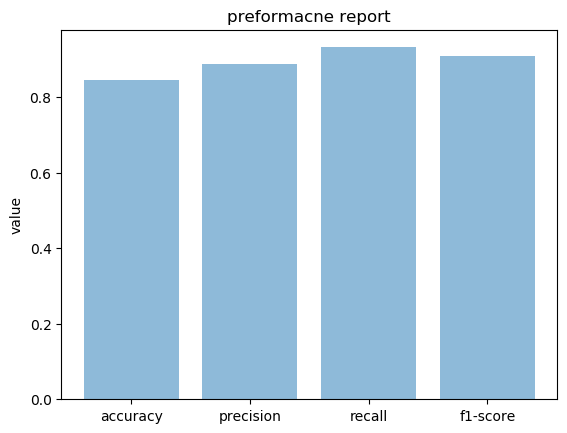

In [10]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


objects = ("accuracy","precision","recall","f1-score")
y_pos = np.arange(len(objects))
performance1 = [accuracy,precision,recall,f1_score]

plt.bar(y_pos, performance1, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('value')
plt.title('preformacne report')

plt.show()


##### LogisticRegression

- LogisticRegression

In [11]:
# import libraries
from sklearn.linear_model import LogisticRegression

logisticRegression = LogisticRegression()

# training the model
logisticRegression.fit(X_train,y_train) 

/Users/liuhongyang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

- LogisticRegression performance

In [12]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics
# predicting on the validation set

predicted= logisticRegression.predict(X_test)

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.73      0.47      0.57      4291
         1.0       0.89      0.96      0.93     19516

    accuracy                           0.87     23807
   macro avg       0.81      0.71      0.75     23807
weighted avg       0.86      0.87      0.86     23807



In [13]:
accuracy = metrics.accuracy_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted)
recall = metrics.recall_score(y_test, predicted)
f1_score=metrics.f1_score(y_test, predicted)

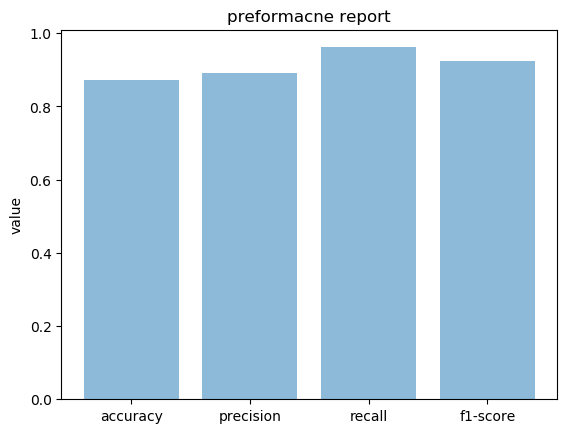

In [14]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


objects = ("accuracy","precision","recall","f1-score")
y_pos = np.arange(len(objects))
performance2 = [accuracy,precision,recall,f1_score]

plt.bar(y_pos, performance2, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('value')
plt.title('preformacne report')

plt.show()

##### Decision Tree

- Decision Tree

In [15]:
# import libraries
from sklearn import tree

decisiontree = tree.DecisionTreeClassifier()

# training the model
decisiontree.fit(X_train,y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

- DecisionTree performance

In [16]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics

# predicting on the validation set
predicted= decisiontree.predict(X_test)

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.46      0.54      0.50      4291
         1.0       0.89      0.86      0.88     19516

    accuracy                           0.80     23807
   macro avg       0.68      0.70      0.69     23807
weighted avg       0.82      0.80      0.81     23807



In [17]:
accuracy = metrics.accuracy_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted)
recall = metrics.recall_score(y_test, predicted)
f1_score=metrics.f1_score(y_test, predicted)

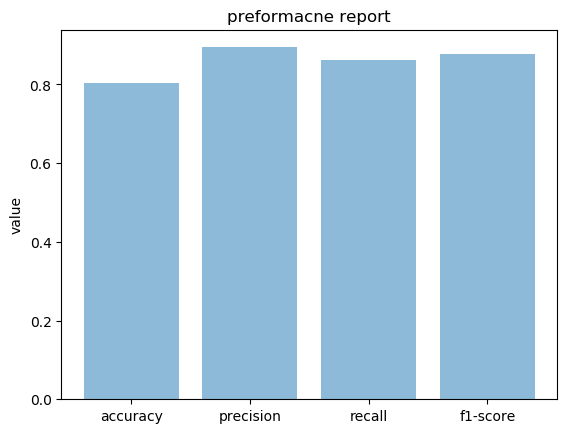

In [18]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


objects = ("accuracy","precision","recall","f1-score")
y_pos = np.arange(len(objects))
performance3 = [accuracy,precision,recall,f1_score]

plt.bar(y_pos, performance3, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('value')
plt.title('preformacne report')

plt.show()

##### Summary

Performance for Naive Bayes, Logistic Regress and Decision Tree using Bag-of-Words

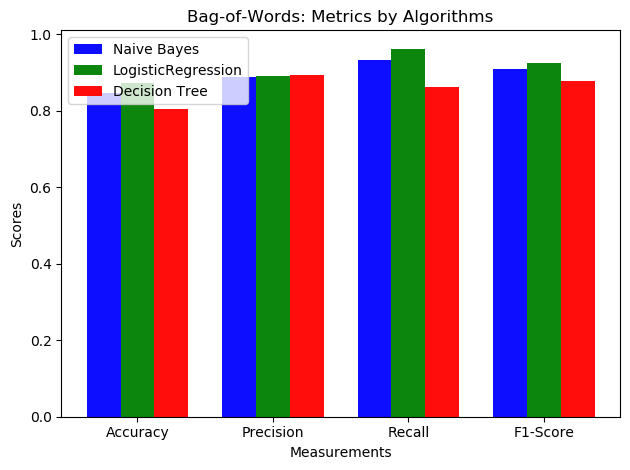

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 4


# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.95

rects1 = plt.bar(index, performance1, bar_width,
alpha=opacity,
color='b',
label='Naive Bayes')

rects2 = plt.bar(index + bar_width,performance2, bar_width,
alpha=opacity,
color='g',
label='LogisticRegression')


rects3 = plt.bar(index + bar_width+ bar_width, performance3, bar_width,
alpha=opacity,
color='r',
label='Decision Tree')



plt.xlabel('Measurements')
plt.ylabel('Scores')
plt.title('Bag-of-Words: Metrics by Algorithms')


plt.xticks(index + bar_width, ('Accuracy', 'Precision', 'Recall', 'F1-Score'))
plt.legend()

plt.tight_layout()
plt.show()

### TF-IDF Features

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfIdf = tfidf_vectorizer.fit_transform(df['text'])


In [21]:
# traing data & target data
X= tfIdf
y= df['label']

In [22]:
from sklearn.model_selection import train_test_split

# splitting data into training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.3)

##### Naive Bayes 

- Naive Bayes

In [23]:
from sklearn.naive_bayes import MultinomialNB


naiveBayes = MultinomialNB()


# training the model
naiveBayes.fit(X_train,y_train) 


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
from sklearn.model_selection import train_test_split

# splitting data into training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.3)

- Naive Bayes Performance

In [25]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics
# predicting on the validation set
predicted= naiveBayes.predict(X_test)

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.87      0.09      0.16      4291
         1.0       0.83      1.00      0.91     19516

    accuracy                           0.83     23807
   macro avg       0.85      0.54      0.54     23807
weighted avg       0.84      0.83      0.77     23807



In [26]:
accuracy = metrics.accuracy_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted)
recall = metrics.recall_score(y_test, predicted)
f1_score=metrics.f1_score(y_test, predicted)

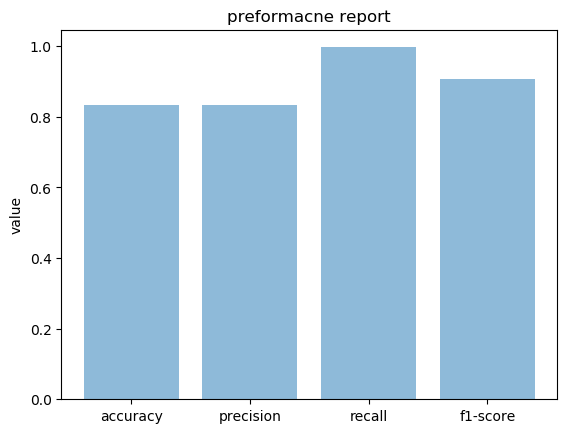

In [27]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


objects = ("accuracy","precision","recall","f1-score")
y_pos = np.arange(len(objects))
performance1 = [accuracy,precision,recall,f1_score]

plt.bar(y_pos, performance1, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('value')
plt.title('preformacne report')

plt.show()

##### LogisticRegression

- LogisticRegression

In [28]:
# import libraries
from sklearn.linear_model import LogisticRegression

logisticRegression = LogisticRegression()

# training the model
logisticRegression.fit(X_train,y_train) 

/Users/liuhongyang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

- LogisticRegression performance

In [29]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics
# predicting on the validation set

predicted= logisticRegression.predict(X_test)

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.75      0.40      0.52      4291
         1.0       0.88      0.97      0.92     19516

    accuracy                           0.87     23807
   macro avg       0.81      0.68      0.72     23807
weighted avg       0.86      0.87      0.85     23807



In [30]:
accuracy = metrics.accuracy_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted)
recall = metrics.recall_score(y_test, predicted)
f1_score=metrics.f1_score(y_test, predicted)

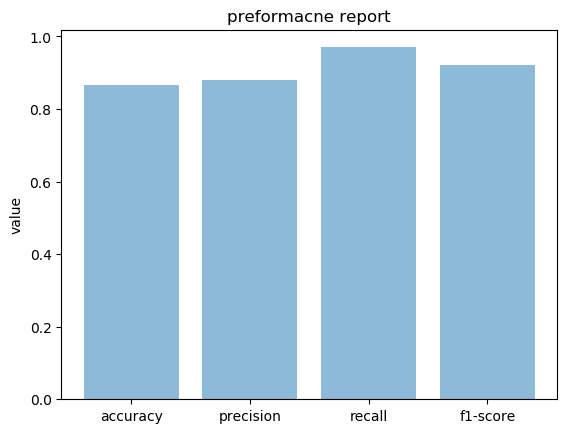

In [31]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


objects = ("accuracy","precision","recall","f1-score")
y_pos = np.arange(len(objects))
performance2 = [accuracy,precision,recall,f1_score]

plt.bar(y_pos, performance2, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('value')
plt.title('preformacne report')

plt.show()

##### Decision Tree

- Decision Tree

In [32]:
# import libraries
from sklearn import tree

decisiontree = tree.DecisionTreeClassifier()

# training the model
decisiontree.fit(X_train,y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

- DecisionTree performance

In [33]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics

# predicting on the validation set
predicted= decisiontree.predict(X_test)

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.48      0.47      0.47      4291
         1.0       0.88      0.89      0.89     19516

    accuracy                           0.81     23807
   macro avg       0.68      0.68      0.68     23807
weighted avg       0.81      0.81      0.81     23807



In [34]:
accuracy = metrics.accuracy_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted)
recall = metrics.recall_score(y_test, predicted)
f1_score=metrics.f1_score(y_test, predicted)

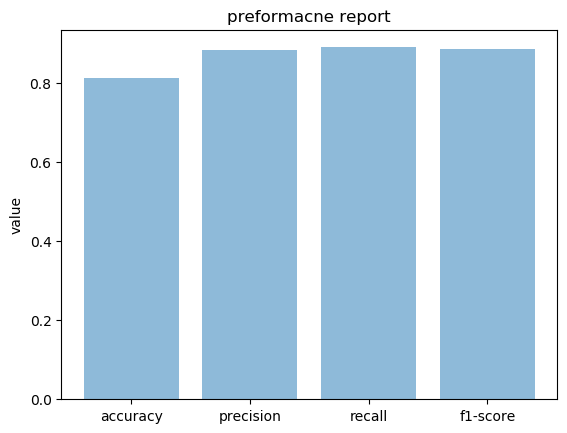

In [35]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


objects = ("accuracy","precision","recall","f1-score")
y_pos = np.arange(len(objects))
performance3 = [accuracy,precision,recall,f1_score]

plt.bar(y_pos, performance3, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('value')
plt.title('preformacne report')

plt.show()

##### Summary

Performance for Naive Bayes, Logistic Regress and Decision Tree using TF-IDF Features

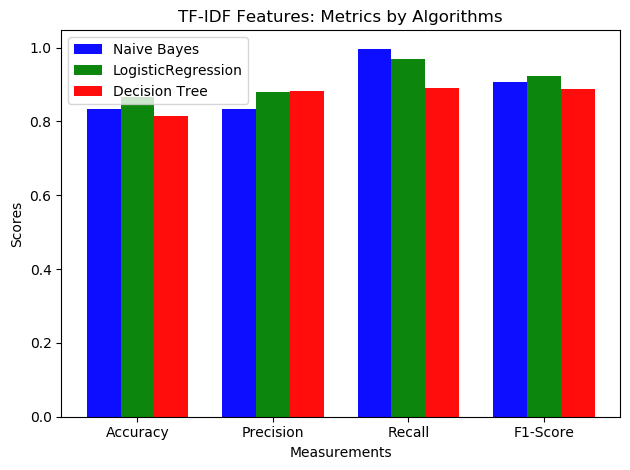

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 4


# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.95

rects1 = plt.bar(index, performance1, bar_width,
alpha=opacity,
color='b',
label='Naive Bayes')

rects2 = plt.bar(index + bar_width,performance2, bar_width,
alpha=opacity,
color='g',
label='LogisticRegression')


rects3 = plt.bar(index + bar_width+ bar_width, performance3, bar_width,
alpha=opacity,
color='r',
label='Decision Tree')



plt.xlabel('Measurements')
plt.ylabel('Scores')
plt.title('TF-IDF Features: Metrics by Algorithms')


plt.xticks(index + bar_width, ('Accuracy', 'Precision', 'Recall', 'F1-Score'))
plt.legend()

plt.tight_layout()
plt.show()

### Overall Summary

In this tutorial, we use two different techniques: Bag-of-Words, TF-IDF to construct features and three different machine learning algorithms to train the data and four different metrics to evaluate the algorithm performance.

In the Bag-of-Words techniques:

- The Logistic regression has better performance for classifying the text data 


In the TF-IDF  techniques:

- The Naive bayes has better performance in recall rate while the LogisticRegression algorithm still has better performance in their another three metrics.